In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


# TRAIN

In [3]:
# train = pd.read_csv('/Volumes/Samsung USB/Data Science/Projects/Credit Risk project/Data/application_train.csv')
# train

In [4]:
train = pd.read_csv(r'D:\Data Science\Projects\Credit Risk project\Data\application_train.csv')
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Cleaning

### Null Features

In [5]:
def fraction_missing(column):
    total_rows = len(column)
    missing_count = column.isnull().sum()
    return missing_count/total_rows

missing_fraction = train.apply(fraction_missing)
missing_fraction

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 122, dtype: float64

In [6]:
high_missing_features_train = missing_fraction[missing_fraction > 0.5]
high_missing_features_train = high_missing_features_train.sort_values(ascending=False)
high_missing_features_train

COMMONAREA_AVG              0.698723
COMMONAREA_MEDI             0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_MEDI       0.683550
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MODE       0.683550
FLOORSMIN_MODE              0.678486
FLOORSMIN_MEDI              0.678486
FLOORSMIN_AVG               0.678486
YEARS_BUILD_MODE            0.664978
YEARS_BUILD_AVG             0.664978
YEARS_BUILD_MEDI            0.664978
OWN_CAR_AGE                 0.659908
LANDAREA_AVG                0.593767
LANDAREA_MEDI               0.593767
LANDAREA_MODE               0.593767
BASEMENTAREA_MEDI           0.585160
BASEMENTAREA_AVG            0.585160
BASEMENTAREA_MODE           0.585160
EXT_SOURCE_1                0.563811
NONLIVINGAREA_MODE          0.551792
NONLIVINGAREA_MEDI          0.551792
NONLIVINGAREA_AVG           0.551792
E

In [7]:
train = train.drop(columns=high_missing_features_train.index)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [8]:
train.select_dtypes(include='object').isnull().sum().sort_values(ascending=False)

EMERGENCYSTATE_MODE           145755
OCCUPATION_TYPE                96391
NAME_TYPE_SUITE                 1292
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
dtype: int64

### Filling Category Nulls

In [9]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### EMERGENCYSTATE_MODE

In [10]:
train['EMERGENCYSTATE_MODE'].value_counts(dropna=False)

EMERGENCYSTATE_MODE
No     159428
NaN    145755
Yes      2328
Name: count, dtype: int64

In [11]:
train['EMERGENCYSTATE_MODE'] = np.where(train['EMERGENCYSTATE_MODE'].isnull(), train['EMERGENCYSTATE_MODE'].mode(), train['EMERGENCYSTATE_MODE'])
train['EMERGENCYSTATE_MODE'].isnull().sum()

0

#### OCCUPATION_TYPE

In [12]:
train['OCCUPATION_TYPE'].value_counts(dropna=False)

OCCUPATION_TYPE
NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [13]:
train['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [14]:
train['OCCUPATION_TYPE'] = train.groupby('NAME_EDUCATION_TYPE')['OCCUPATION_TYPE'].transform(lambda x: x.fillna(x.mode()).iloc[0])
train['OCCUPATION_TYPE'].isnull().sum()

3816

In [15]:
train['OCCUPATION_TYPE'] = train.groupby('ORGANIZATION_TYPE')['OCCUPATION_TYPE'].transform(lambda x: x.fillna(x.mode()).iloc[0])
train['OCCUPATION_TYPE'].isnull().sum()

0

#### NAME_TYPE_SUITE

In [16]:
train['NAME_TYPE_SUITE'].value_counts(dropna=False)

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: count, dtype: int64

In [17]:
train['NAME_TYPE_SUITE'] = train.groupby('NAME_FAMILY_STATUS')['NAME_TYPE_SUITE'].transform(lambda x: x.fillna(x.mode()).iloc[0])
train['NAME_TYPE_SUITE'].isnull().sum()

2

In [18]:
train['NAME_TYPE_SUITE'] = np.where(train['NAME_TYPE_SUITE'].isnull(), train['NAME_TYPE_SUITE'].mode(), train['NAME_TYPE_SUITE'])
train['NAME_TYPE_SUITE'].isnull().sum()

0

#### NAME_EDUCATION_TYPE

In [19]:
train['NAME_EDUCATION_TYPE'] = np.where(train['NAME_EDUCATION_TYPE']=='Secondary / secondary special', 'Secondary', train['NAME_EDUCATION_TYPE'])

### Filling Numerical Nulls

In [20]:
pd.set_option('display.max_rows', None)
train.select_dtypes(include=('int', 'float')).isnull().sum().sort_values(ascending=False)

FLOORSMAX_MEDI                  153020
FLOORSMAX_MODE                  153020
FLOORSMAX_AVG                   153020
YEARS_BEGINEXPLUATATION_MEDI    150007
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BEGINEXPLUATATION_AVG     150007
TOTALAREA_MODE                  148431
EXT_SOURCE_3                     60965
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       660
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
CNT_FAM_MEMBERS                      2
DAYS_LAST_PHONE_CHANGE               1
FLAG_DOCUMENT_13                     0
FLAG_DOCUMENT_7                      0
FLAG_DOCUMENT_8          

In [21]:
pd.reset_option('display.max_rows')

#### FLOORSMAX_MEDI

In [22]:
train['FLOORSMAX_MEDI'].value_counts()

FLOORSMAX_MEDI
0.1667    63607
0.3333    33279
0.0417    14832
0.3750     8207
0.1250     7079
0.0833     6657
0.4583     3089
0.0000     2995
0.6250     2042
0.5417     1860
0.2500     1684
0.6667     1675
0.2083     1544
0.2917      567
0.1042      460
0.3542      459
0.5833      439
0.3958      346
0.4167      329
0.1458      321
0.5000      312
0.2708      291
0.1875      245
0.8750      223
0.4792      220
0.7083      204
1.0000      170
0.4375      138
0.7500      136
0.0625      132
0.3125      131
0.2292      128
0.0208      126
0.6042      115
0.9583       95
0.7917       61
0.5208       47
0.5625       46
0.8333       39
0.9167       37
0.6458       30
0.7708       27
0.6875       24
0.8125       23
0.7292       10
0.9375        4
0.8542        3
0.8958        2
0.9792        1
Name: count, dtype: int64

In [23]:
train['FLOORSMAX_MEDI'] = np.where(train['FLOORSMAX_MEDI'].isnull(), train['FLOORSMAX_MEDI'].mean(), train['FLOORSMAX_MEDI'])
train['FLOORSMAX_MEDI'].isnull().sum()

0

#### FLOORSMAX_MODE

In [24]:
train['FLOORSMAX_MODE'].value_counts(dropna=False)

FLOORSMAX_MODE
NaN       153020
0.1667     65550
0.3333     34373
0.0417     15616
0.3750      8321
0.1250      7267
0.0833      6785
0.0000      3415
0.4583      3216
0.6250      2075
0.5417      1836
0.6667      1710
0.2083      1505
0.2500       572
0.2917       511
0.5833       391
0.4167       236
0.8750       229
0.7083       199
0.5000       184
1.0000       164
0.7500       124
0.9583        94
0.7917        58
0.9167        38
0.8333        22
Name: count, dtype: int64

In [25]:
train['FLOORSMAX_MODE'] = np.where(train['FLOORSMAX_MODE'].isnull(), train['FLOORSMAX_MODE'].mode(), train['FLOORSMAX_MODE'])
train['FLOORSMAX_MODE'].isnull().sum()

0

#### FLOORSMAX_AVG

In [26]:
train['FLOORSMAX_AVG'].value_counts(dropna=False)

FLOORSMAX_AVG
NaN       153020
0.1667     61875
0.3333     31909
0.0417     14600
0.3750      7926
           ...  
0.1792         1
0.2200         1
0.1133         1
0.0900         1
0.2042         1
Name: count, Length: 404, dtype: int64

In [27]:
train['FLOORSMAX_AVG'].mean()

0.22628190703665588

In [28]:
train['FLOORSMAX_AVG'] = np.where(train['FLOORSMAX_AVG'].isnull(), train['FLOORSMAX_AVG'].mean(), train['FLOORSMAX_AVG'])
train['FLOORSMAX_AVG'].isnull().sum()

0

#### YEARS_BEGINEXPLUATATION_MEDI

In [29]:
train['YEARS_BEGINEXPLUATATION_MEDI'] = np.where(train['YEARS_BEGINEXPLUATATION_MEDI'].isnull(), train['YEARS_BEGINEXPLUATATION_MEDI'].mean(), train['YEARS_BEGINEXPLUATATION_MEDI'])
train['YEARS_BEGINEXPLUATATION_MEDI'].isnull().sum()

0

#### YEARS_BEGINEXPLUATATION_MODE

In [30]:
train['YEARS_BEGINEXPLUATATION_MODE'] = np.where(train['YEARS_BEGINEXPLUATATION_MODE'].isnull(), train['YEARS_BEGINEXPLUATATION_MODE'].mode(), train['YEARS_BEGINEXPLUATATION_MODE'])
train['YEARS_BEGINEXPLUATATION_MODE'].isnull().sum()

0

#### YEARS_BEGINEXPLUATATION_AVG

In [31]:
train['YEARS_BEGINEXPLUATATION_AVG'] = np.where(train['YEARS_BEGINEXPLUATATION_AVG'].isnull(), train['YEARS_BEGINEXPLUATATION_AVG'].mean(), train['YEARS_BEGINEXPLUATATION_AVG'])
train['YEARS_BEGINEXPLUATATION_AVG'].isnull().sum()

0

#### TOTALAREA_MODE

In [32]:
train['TOTALAREA_MODE'].value_counts()

TOTALAREA_MODE
0.0000    582
0.0570    247
0.0547    230
0.0550    227
0.0555    227
         ... 
0.3445      1
0.2894      1
0.8712      1
0.5775      1
0.7970      1
Name: count, Length: 5116, dtype: int64

In [33]:
train['TOTALAREA_MODE'] = train.groupby('NAME_HOUSING_TYPE')['TOTALAREA_MODE'].transform(lambda x: x.fillna(x.mode()).iloc[0])
train['TOTALAREA_MODE'].isnull().sum()

18681

In [34]:
train['TOTALAREA_MODE'] = np.where(train['TOTALAREA_MODE'].isnull(), train['TOTALAREA_MODE'].mode(), train['TOTALAREA_MODE'])
train['TOTALAREA_MODE'].isnull().sum()

0

#### EXT_SOURCE_3

In [35]:
train['EXT_SOURCE_3'].value_counts(dropna=False)

EXT_SOURCE_3
NaN         60965
0.746300     1460
0.713631     1315
0.694093     1276
0.670652     1191
            ...  
0.028674        1
0.025272        1
0.021492        1
0.014556        1
0.043227        1
Name: count, Length: 815, dtype: int64

In [36]:
train['EXT_SOURCE_3'] = np.where(train['EXT_SOURCE_3'].isnull(), train['EXT_SOURCE_3'].mean(), train['EXT_SOURCE_3'])
train['EXT_SOURCE_3'].isnull().sum()

0

#### AMT_REQ_CREDIT_BUREAU_QRT 

In [37]:
train['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(dropna=False)

AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
NaN       41519
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64

In [38]:
train['AMT_REQ_CREDIT_BUREAU_QRT'] = np.where(train['AMT_REQ_CREDIT_BUREAU_QRT'].isnull(), train['AMT_REQ_CREDIT_BUREAU_QRT'].mode(), train['AMT_REQ_CREDIT_BUREAU_QRT'])
train['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

#### AMT_REQ_CREDIT_BUREAU_MON

In [39]:
train['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(dropna=False)

AMT_REQ_CREDIT_BUREAU_MON
0.0     222233
NaN      41519
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64

In [40]:
train['AMT_REQ_CREDIT_BUREAU_MON'] = np.where(train['AMT_REQ_CREDIT_BUREAU_MON'].isnull(), train['AMT_REQ_CREDIT_BUREAU_MON'].mode(), train['AMT_REQ_CREDIT_BUREAU_MON'])
train['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

0

#### AMT_REQ_CREDIT_BUREAU_WEEK

In [41]:
train['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(dropna=False)

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
NaN     41519
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64

In [42]:
train['AMT_REQ_CREDIT_BUREAU_WEEK'] = np.where(train['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull(), train['AMT_REQ_CREDIT_BUREAU_WEEK'].mode(), train['AMT_REQ_CREDIT_BUREAU_WEEK'])
train['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

#### AMT_REQ_CREDIT_BUREAU_DAY

In [43]:
train['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(dropna=False)

AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
NaN     41519
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64

In [44]:
train['AMT_REQ_CREDIT_BUREAU_DAY'] = np.where(train['AMT_REQ_CREDIT_BUREAU_DAY'].isnull(), train['AMT_REQ_CREDIT_BUREAU_DAY'].mode(), train['AMT_REQ_CREDIT_BUREAU_DAY'])
train['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

0

#### AMT_REQ_CREDIT_BUREAU_HOUR

In [45]:
train['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(dropna=False)

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
NaN     41519
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

In [46]:
train['AMT_REQ_CREDIT_BUREAU_HOUR'] = np.where(train['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull(), train['AMT_REQ_CREDIT_BUREAU_HOUR'].mode(), train['AMT_REQ_CREDIT_BUREAU_HOUR'])
train['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

#### AMT_REQ_CREDIT_BUREAU_YEAR

In [47]:
train['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(dropna=False)

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
NaN     41519
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64

In [48]:
train['AMT_REQ_CREDIT_BUREAU_YEAR'] = np.where(train['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull(), train['AMT_REQ_CREDIT_BUREAU_YEAR'].mode(), train['AMT_REQ_CREDIT_BUREAU_YEAR'])
train['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

0

#### OBS_60_CNT_SOCIAL_CIRCLE 

In [49]:
train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts(dropna=False)

OBS_60_CNT_SOCIAL_CIRCLE
0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
NaN        1021
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
47.0          1
344.0         1
30.0          1
26.0          1
Name: count, dtype: int64

In [50]:
train['OBS_60_CNT_SOCIAL_CIRCLE'] = np.where(train['OBS_60_CNT_SOCIAL_CIRCLE'].isnull(), train['OBS_60_CNT_SOCIAL_CIRCLE'].mode(), train['OBS_60_CNT_SOCIAL_CIRCLE'])
train['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

#### DEF_30_CNT_SOCIAL_CIRCLE

In [51]:
train['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts(dropna=False)

DEF_30_CNT_SOCIAL_CIRCLE
0.0     271324
1.0      28328
2.0       5323
3.0       1192
NaN       1021
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: count, dtype: int64

In [52]:
train['DEF_30_CNT_SOCIAL_CIRCLE'] = np.where(train['DEF_30_CNT_SOCIAL_CIRCLE'].isnull(), train['DEF_30_CNT_SOCIAL_CIRCLE'].mode(), train['DEF_30_CNT_SOCIAL_CIRCLE'])
train['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

#### OBS_30_CNT_SOCIAL_CIRCLE

In [53]:
train['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts(dropna=False)

OBS_30_CNT_SOCIAL_CIRCLE
0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
NaN        1021
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: count, dtype: int64

In [54]:
train['OBS_30_CNT_SOCIAL_CIRCLE'] = np.where(train['OBS_30_CNT_SOCIAL_CIRCLE'].isnull(), train['OBS_30_CNT_SOCIAL_CIRCLE'].mode(), train['OBS_30_CNT_SOCIAL_CIRCLE'])
train['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

#### DEF_60_CNT_SOCIAL_CIRCLE

In [55]:
train['DEF_60_CNT_SOCIAL_CIRCLE'] = np.where(train['DEF_60_CNT_SOCIAL_CIRCLE'].isnull(), train['DEF_60_CNT_SOCIAL_CIRCLE'].mode(), train['DEF_60_CNT_SOCIAL_CIRCLE'])
train['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

#### EXT_SOURCE_2

In [56]:
train['EXT_SOURCE_2'].value_counts(dropna=False)

EXT_SOURCE_2
0.285898    721
NaN         660
0.262258    417
0.265256    343
0.159679    322
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: count, Length: 119832, dtype: int64

In [57]:
train['EXT_SOURCE_2'] = np.where(train['EXT_SOURCE_2'].isnull(), train['EXT_SOURCE_2'].mean(), train['EXT_SOURCE_2'])
train['EXT_SOURCE_2'].isnull().sum()

0

#### AMT_GOODS_PRICE

In [58]:
train['AMT_GOODS_PRICE'].value_counts(dropna=False)

AMT_GOODS_PRICE
450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
447606.0         1
2106000.0        1
894654.0         1
323982.0         1
743863.5         1
Name: count, Length: 1003, dtype: int64

In [59]:
train['AMT_GOODS_PRICE'] = np.where(train['AMT_GOODS_PRICE'].isnull(), train['AMT_GOODS_PRICE'].mean(), train['AMT_GOODS_PRICE'])
train['AMT_GOODS_PRICE'].isnull().sum()

0

In [60]:
train['AMT_GOODS_PRICE'] = train['AMT_GOODS_PRICE'].round(20)

#### AMT_ANNUITY

In [61]:
train['AMT_ANNUITY'].value_counts(dropna=False)

AMT_ANNUITY
9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: count, Length: 13673, dtype: int64

In [62]:
train['AMT_ANNUITY'] = np.where(train['AMT_ANNUITY'].isnull(), train['AMT_ANNUITY'].mean(), train['AMT_ANNUITY'])
train['AMT_ANNUITY'].isnull().sum()

0

#### CNT_FAM_MEMBERS

In [63]:
train['CNT_FAM_MEMBERS'] = np.where(train['CNT_FAM_MEMBERS'].isnull(), train['CNT_FAM_MEMBERS'].mode(), train['CNT_FAM_MEMBERS'])
train['CNT_FAM_MEMBERS'].isnull().sum()

0

#### DAYS_LAST_PHONE_CHANGE

In [64]:
train['DAYS_LAST_PHONE_CHANGE'] = np.where(train['DAYS_LAST_PHONE_CHANGE'].isnull(), train['DAYS_LAST_PHONE_CHANGE'].mode(), train['DAYS_LAST_PHONE_CHANGE'])
train['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

In [65]:
train.isnull().sum().sort_values(ascending=False)

SK_ID_CURR                    0
EXT_SOURCE_3                  0
FLAG_DOCUMENT_6               0
FLAG_DOCUMENT_5               0
FLAG_DOCUMENT_4               0
                             ..
FLAG_EMAIL                    0
FLAG_PHONE                    0
FLAG_CONT_MOBILE              0
FLAG_WORK_PHONE               0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 81, dtype: int64

# BUREAU BALANCE

In [66]:
bb = pd.read_csv(r'C:\Users\rvuon\OneDrive\Documents\Learning Fuze\database\Project Loan\home-credit-default-risk\bureau_balance.csv')
bb

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [67]:
bb.isnull().sum().sort_values(ascending=False)

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [68]:
bb['STATUS'].value_counts()

STATUS
C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: count, dtype: int64

# BUREAU

In [69]:
b = pd.read_csv(r'C:\Users\rvuon\OneDrive\Documents\Learning Fuze\database\Project Loan\home-credit-default-risk\bureau.csv')
b

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [70]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [71]:
b.isnull().sum().sort_values(ascending=False)

AMT_ANNUITY               1226791
AMT_CREDIT_MAX_OVERDUE    1124488
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_DEBT        257669
DAYS_CREDIT_ENDDATE        105553
AMT_CREDIT_SUM                 13
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
SK_ID_BUREAU                    0
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
SK_ID_CURR                      0
dtype: int64

## Data Cleaning

In [72]:
duplicates = b.duplicated()
b[duplicates]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY


In [73]:
def fraction_missing(column):
    total_rows = len(column)
    missing_count = column.isnull().sum()
    return missing_count/total_rows

missing_fraction = b.apply(fraction_missing)
missing_fraction

SK_ID_CURR                0.000000
SK_ID_BUREAU              0.000000
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CREDIT_DAY_OVERDUE        0.000000
DAYS_CREDIT_ENDDATE       0.061496
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_MAX_OVERDUE    0.655133
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM            0.000008
AMT_CREDIT_SUM_DEBT       0.150119
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
DAYS_CREDIT_UPDATE        0.000000
AMT_ANNUITY               0.714735
dtype: float64

In [74]:
high_missing_features_b = missing_fraction[missing_fraction > 0.5]
high_missing_features_b = high_missing_features_b.sort_values(ascending=False)
high_missing_features_b

AMT_ANNUITY               0.714735
AMT_CREDIT_MAX_OVERDUE    0.655133
dtype: float64

In [75]:
b.select_dtypes(include='object').isnull().sum().sort_values(ascending=False)

CREDIT_ACTIVE      0
CREDIT_CURRENCY    0
CREDIT_TYPE        0
dtype: int64

In [76]:
b.select_dtypes(include=('int', 'float')).isnull().sum().sort_values(ascending=False)

AMT_ANNUITY               1226791
AMT_CREDIT_MAX_OVERDUE    1124488
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_DEBT        257669
DAYS_CREDIT_ENDDATE        105553
AMT_CREDIT_SUM                 13
SK_ID_CURR                      0
SK_ID_BUREAU                    0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM_OVERDUE          0
DAYS_CREDIT_UPDATE              0
dtype: int64

### Fill Numerical Nulls

#### AMT_ANNUITY

In [77]:
b['AMT_ANNUITY'].value_counts(dropna=False)

AMT_ANNUITY
NaN           1226791
0.000          256915
4500.000         5182
13500.000        3147
22500.000        2502
               ...   
21228.750           1
7263.270            1
49215.015           1
144405.000          1
24351.435           1
Name: count, Length: 40322, dtype: int64

In [78]:
b.groupby('CREDIT_TYPE')['AMT_ANNUITY'].mean()

CREDIT_TYPE
Another type of loan                            30619.190593
Car loan                                        33889.117467
Cash loan (non-earmarked)                       16102.715294
Consumer credit                                 15389.301249
Credit card                                     12379.794494
Interbank credit                                         NaN
Loan for business development                   39319.372875
Loan for purchase of shares (margin lending)    46868.490000
Loan for the purchase of equipment              31635.855000
Loan for working capital replenishment          17103.931216
Microloan                                        7966.019973
Mobile operator loan                             4054.500000
Mortgage                                        69662.136225
Real estate loan                                17786.970000
Unknown type of loan                            20592.980722
Name: AMT_ANNUITY, dtype: float64

In [79]:
b['AMT_ANNUITY'] = b.groupby('CREDIT_TYPE')['AMT_ANNUITY'].transform(lambda x: x.fillna(x.mean()))
b['AMT_ANNUITY'].isnull().sum()

1

In [80]:
b['AMT_ANNUITY'] = np.where(b['AMT_ANNUITY'].isnull(), b['AMT_ANNUITY'].mean(), b['AMT_ANNUITY'])
b['AMT_ANNUITY'].isnull().sum()

0

#### AMT_CREDIT_MAX_OVERDUE

In [81]:
b['AMT_CREDIT_MAX_OVERDUE'].value_counts(dropna=False)

AMT_CREDIT_MAX_OVERDUE
NaN          1124488
0.000         470650
1440.000         688
225.000          405
45.000           377
              ...   
38506.500          1
47700.000          1
4093.470           1
4009.140           1
5693.625           1
Name: count, Length: 68252, dtype: int64

In [82]:
b[b['AMT_CREDIT_MAX_OVERDUE']==0]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.000,71017.38,108982.62,0.0,Credit card,-31,12379.794494
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.800,42103.80,0.00,0.0,Consumer credit,-22,15389.301249
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.700,0.00,0.00,0.0,Consumer credit,-840,15389.301249
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.000,0.00,0.00,0.0,Credit card,-690,12379.794494
10,162297,5714472,Active,currency 1,-1146,0,-180.0,NaN,0.0,0,337500.000,0.00,0.00,0.0,Credit card,-690,12379.794494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716406,335468,5057618,Closed,currency 1,-2517,0,-660.0,-2363.0,0.0,0,473940.000,0.00,0.00,0.0,Car loan,-2363,33889.117467
1716409,146896,5057636,Closed,currency 1,-1705,0,-582.0,-582.0,0.0,0,0.000,0.00,0.00,0.0,Credit card,-582,12379.794494
1716411,232118,5057652,Closed,currency 1,-821,0,-425.0,-545.0,0.0,0,108765.720,0.00,0.00,0.0,Consumer credit,-545,15389.301249
1716418,433007,5057708,Closed,currency 1,-1389,0,-1299.0,-1299.0,0.0,0,334158.435,0.00,0.00,0.0,Consumer credit,-1299,15389.301249


In [83]:
b[b['AMT_CREDIT_SUM_OVERDUE']==0]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,15389.301249
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,12379.794494
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,15389.301249
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,12379.794494
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,15389.301249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,7966.019973
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,15389.301249
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,15389.301249
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,15389.301249


In [84]:
b['AMT_CREDIT_MAX_OVERDUE'] = np.where((b['AMT_CREDIT_MAX_OVERDUE'].isnull()) & (b['AMT_CREDIT_SUM_OVERDUE']==0.0), 0, b['AMT_CREDIT_MAX_OVERDUE'])
b['AMT_CREDIT_MAX_OVERDUE'].isnull().sum()

3409

In [85]:
b['AMT_CREDIT_MAX_OVERDUE'] = np.where(b['AMT_CREDIT_MAX_OVERDUE'].isnull(), b['AMT_CREDIT_MAX_OVERDUE'].mean(), b['AMT_CREDIT_MAX_OVERDUE'])
b['AMT_CREDIT_MAX_OVERDUE'].isnull().sum()

0

#### DAYS_ENDDATE_FACT

In [86]:
b['DAYS_ENDDATE_FACT'].value_counts(dropna=False)

DAYS_ENDDATE_FACT
 NaN       633653
-329.0        811
-273.0        794
-301.0        791
-91.0         785
            ...  
-2905.0         1
-2898.0         1
-2900.0         1
-2922.0         1
-2891.0         1
Name: count, Length: 2918, dtype: int64

In [87]:
b['DAYS_ENDDATE_FACT'] = np.where(b['DAYS_ENDDATE_FACT'].isnull, b['DAYS_CREDIT_UPDATE'], b['DAYS_ENDDATE_FACT'])
b['DAYS_ENDDATE_FACT'].isnull().sum()

0

#### AMT_CREDIT_SUM_LIMIT

In [88]:
b['AMT_CREDIT_SUM_LIMIT'].value_counts(dropna=False)

AMT_CREDIT_SUM_LIMIT
0.000          1050142
NaN             591780
135000.000        2178
4500.000          1474
45000.000         1335
                ...   
275075.100           1
20639.160            1
49464.000            1
1004866.920          1
135035.865           1
Name: count, Length: 51727, dtype: int64

In [89]:
b[b['AMT_CREDIT_SUM_LIMIT']==0.0][['AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM']]

,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM
6,0.0,42103.8,42103.80
7,0.0,0.0,76878.45
8,0.0,0.0,103007.70
9,0.0,0.0,4500.00
10,0.0,0.0,337500.00
...,...,...,...
1716419,0.0,0.0,28248.84
1716420,0.0,0.0,27000.00
1716423,0.0,11250.0,11250.00
1716424,0.0,0.0,38130.84


In [90]:
b['AMT_CREDIT_SUM_LIMIT'] = np.where((b['AMT_CREDIT_SUM_LIMIT'].isnull()) & (b['AMT_CREDIT_SUM_DEBT']==0.0) & (b['AMT_CREDIT_SUM']==0.0), 0.0, b['AMT_CREDIT_SUM_LIMIT'])
b['AMT_CREDIT_SUM_LIMIT'].isnull().sum()

584055

In [91]:
b['AMT_CREDIT_SUM_LIMIT'] = np.where((b['AMT_CREDIT_SUM_LIMIT'].isnull()) & (b['AMT_CREDIT_SUM'] == b['AMT_CREDIT_SUM_DEBT']), 0.0, b['AMT_CREDIT_SUM_LIMIT'])
b['AMT_CREDIT_SUM_LIMIT'].isnull().sum()

582076

In [92]:
b['AMT_CREDIT_SUM_LIMIT'] = b.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_LIMIT'].transform(lambda x: x.fillna(x.mean()))
b['AMT_CREDIT_SUM_LIMIT'].isnull().sum()

53179

In [93]:
b['AMT_CREDIT_SUM_LIMIT'] = np.where(b['AMT_CREDIT_SUM_LIMIT'].isnull(), b['AMT_CREDIT_SUM_LIMIT'].median(), b['AMT_CREDIT_SUM_LIMIT'])
b['AMT_CREDIT_SUM_LIMIT'].isnull().sum()


0

#### AMT_CREDIT_SUM_DEBT

In [94]:
b['AMT_CREDIT_SUM_DEBT'].value_counts(dropna=False)

AMT_CREDIT_SUM_DEBT
 0.000          1016434
 NaN             257669
 4.500              653
-450.000            543
 135000.000         344
                 ...   
 1396746.000          1
 650376.000           1
 477810.000           1
 312660.765           1
 1092226.500          1
Name: count, Length: 226538, dtype: int64

In [95]:
b[b['AMT_CREDIT_SUM_DEBT']==0][['AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM']]

,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM
0,36327.54,0.0,91323.00
7,0.00,0.0,76878.45
8,0.00,0.0,103007.70
9,0.00,0.0,4500.00
10,0.00,0.0,337500.00
...,...,...,...
1716421,0.00,0.0,195408.00
1716422,0.00,0.0,202500.00
1716424,0.00,0.0,38130.84
1716426,0.00,0.0,36000.00


In [96]:
b['AMT_CREDIT_SUM_DEBT'] = np.where((b['AMT_CREDIT_SUM_DEBT'].isnull()) & (b['AMT_CREDIT_SUM_LIMIT']==0.00), 0.0, b['AMT_CREDIT_SUM_DEBT'])
b['AMT_CREDIT_SUM_DEBT'].isnull().sum()

55657

In [97]:
b[b['AMT_CREDIT_SUM_DEBT']>1][['AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM']]

,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM
1,36327.540,171342.00,225000.0
5,108982.620,71017.38,180000.0
6,0.000,42103.80,42103.8
13,0.000,76905.00,89910.0
17,57080.025,520920.00,450000.0
...,...,...,...
1716403,0.000,1092226.50,1431000.0
1716404,0.000,432787.50,450000.0
1716412,0.000,10971.00,225000.0
1716417,75150.000,2466.00,67500.0


In [98]:
b['AMT_CREDIT_SUM_DEBT'] = np.where(b['AMT_CREDIT_SUM_DEBT'].isnull(), b['AMT_CREDIT_SUM_DEBT'].mean(), b['AMT_CREDIT_SUM_DEBT'])
b['AMT_CREDIT_SUM_DEBT'].isnull().sum()

0

#### DAYS_CREDIT_ENDDATE

In [99]:
b['DAYS_CREDIT_ENDDATE'].value_counts(dropna=False)

DAYS_CREDIT_ENDDATE
 NaN       105553
 0.0          883
 3.0          845
-7.0          837
 1.0          830
            ...  
 3827.0         1
 5585.0         1
 5833.0         1
 7277.0         1
 5650.0         1
Name: count, Length: 14097, dtype: int64

In [100]:
b['DAYS_CREDIT_ENDDATE'].min()

-42060.0

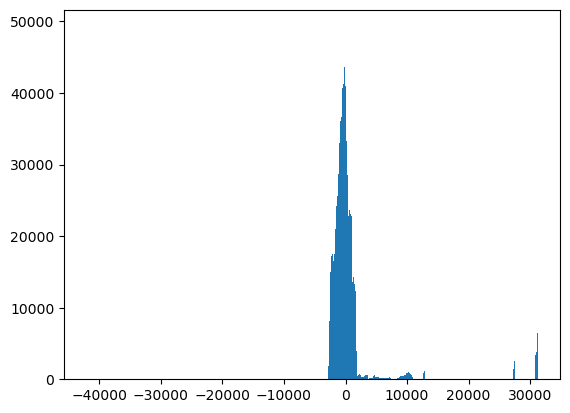

In [101]:
plt.hist(b['DAYS_CREDIT_ENDDATE'], bins=1000);

In [102]:
b['DAYS_CREDIT_ENDDATE'].mean()

510.51736230309615

In [103]:
b['DAYS_CREDIT_ENDDATE'].median()

-330.0

In [104]:
b['DAYS_CREDIT_ENDDATE'] = np.where(b['DAYS_CREDIT_ENDDATE'].isnull(), b['DAYS_CREDIT_UPDATE'], b['DAYS_CREDIT_ENDDATE'])
b['DAYS_CREDIT_ENDDATE'].isnull().sum()

0

#### AMT_CREDIT_SUM

In [105]:
b['AMT_CREDIT_SUM'].value_counts(dropna=False)

AMT_CREDIT_SUM
0.000         66582
225000.000    57608
135000.000    50195
450000.000    37156
90000.000     36940
              ...  
18915.030         1
167026.095        1
57044.250         1
69295.410         1
108765.720        1
Name: count, Length: 236709, dtype: int64

In [106]:
b['AMT_CREDIT_SUM'] = np.where(b['AMT_CREDIT_SUM'].isnull(), b['AMT_CREDIT_SUM'].mean(), b['AMT_CREDIT_SUM'])
b['AMT_CREDIT_SUM'].isnull().sum()

0

In [107]:
b.isnull().sum()

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
DAYS_ENDDATE_FACT         0
AMT_CREDIT_MAX_OVERDUE    0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
AMT_ANNUITY               0
dtype: int64

### Feature Engineering

In [108]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


### Groupby SK_ID_CURR

In [109]:
b = b[['SK_ID_BUREAU', 'SK_ID_CURR', 'CREDIT_ACTIVE','CREDIT_TYPE', 'CREDIT_DAY_OVERDUE', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE']]

In [110]:
### Group by SK_ID_CURR and take the mean and mode of each feature

mode_func = lambda x: x.mode().iloc[0]
mean_func = 'mean'
agg_funcs = {
    'CREDIT_ACTIVE': mode_func,
    'CREDIT_TYPE': mode_func,
    'CNT_CREDIT_PROLONG': mean_func,
    'CREDIT_DAY_OVERDUE': mean_func,
    'AMT_CREDIT_MAX_OVERDUE': mean_func,
    'AMT_CREDIT_SUM': mean_func,
    'AMT_CREDIT_SUM_DEBT': mean_func,
    'AMT_CREDIT_SUM_LIMIT': mean_func,
    'AMT_CREDIT_SUM_OVERDUE': mean_func
    }

b = b.groupby('SK_ID_CURR').agg(agg_funcs).reset_index()
b

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_TYPE,CNT_CREDIT_PROLONG,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE
0,100001,Closed,Consumer credit,0.000000,0.0,0.000000,2.076236e+05,85240.928571,0.000,0.0
1,100002,Closed,Consumer credit,0.000000,0.0,1050.643125,1.081319e+05,75876.536759,6397.713,0.0
2,100003,Closed,Consumer credit,0.000000,0.0,0.000000,2.543501e+05,0.000000,202500.000,0.0
3,100004,Closed,Consumer credit,0.000000,0.0,0.000000,9.451890e+04,0.000000,0.000,0.0
4,100005,Active,Consumer credit,0.000000,0.0,0.000000,2.190420e+05,189469.500000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...
305806,456249,Closed,Consumer credit,0.000000,0.0,2364.230769,2.841430e+05,12543.923077,0.000,0.0
305807,456250,Active,Consumer credit,0.000000,0.0,0.000000,1.028820e+06,744013.365000,19422.795,0.0
305808,456253,Active,Consumer credit,0.000000,0.0,0.000000,9.900000e+05,448958.250000,0.000,0.0
305809,456254,Closed,Consumer credit,0.000000,0.0,0.000000,4.500000e+04,0.000000,0.000,0.0


# Credit Card Balance

In [111]:
ccb = pd.read_csv(r'C:\Users\rvuon\OneDrive\Documents\Learning Fuze\database\Project Loan\home-credit-default-risk\credit_card_balance.csv')
ccb

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [112]:
ccb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [113]:
def fraction_missing(column):
    total_rows = len(column)
    missing_count = column.isnull().sum()
    return missing_count/total_rows

missing_fraction = ccb.apply(fraction_missing)
missing_fraction

SK_ID_PREV                    0.000000
SK_ID_CURR                    0.000000
MONTHS_BALANCE                0.000000
AMT_BALANCE                   0.000000
AMT_CREDIT_LIMIT_ACTUAL       0.000000
AMT_DRAWINGS_ATM_CURRENT      0.195249
AMT_DRAWINGS_CURRENT          0.000000
AMT_DRAWINGS_OTHER_CURRENT    0.195249
AMT_DRAWINGS_POS_CURRENT      0.195249
AMT_INST_MIN_REGULARITY       0.079482
AMT_PAYMENT_CURRENT           0.199981
AMT_PAYMENT_TOTAL_CURRENT     0.000000
AMT_RECEIVABLE_PRINCIPAL      0.000000
AMT_RECIVABLE                 0.000000
AMT_TOTAL_RECEIVABLE          0.000000
CNT_DRAWINGS_ATM_CURRENT      0.195249
CNT_DRAWINGS_CURRENT          0.000000
CNT_DRAWINGS_OTHER_CURRENT    0.195249
CNT_DRAWINGS_POS_CURRENT      0.195249
CNT_INSTALMENT_MATURE_CUM     0.079482
NAME_CONTRACT_STATUS          0.000000
SK_DPD                        0.000000
SK_DPD_DEF                    0.000000
dtype: float64

In [114]:
high_missing_features_ccb = missing_fraction[missing_fraction > 0.5]
high_missing_features_ccb = high_missing_features_ccb.sort_values(ascending=False)
high_missing_features_ccb

Series([], dtype: float64)

In [115]:
ccb.select_dtypes(include='object').isnull().sum().sort_values(ascending=False)

NAME_CONTRACT_STATUS    0
dtype: int64

In [116]:
ccb.select_dtypes(include=('int', 'float')).isnull().sum().sort_values(ascending=False)

AMT_PAYMENT_CURRENT           767988
CNT_DRAWINGS_POS_CURRENT      749816
AMT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
AMT_INST_MIN_REGULARITY       305236
SK_ID_PREV                         0
AMT_TOTAL_RECEIVABLE               0
SK_DPD                             0
CNT_DRAWINGS_CURRENT               0
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECIVABLE                      0
AMT_RECEIVABLE_PRINCIPAL           0
SK_ID_CURR                         0
AMT_DRAWINGS_CURRENT               0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_BALANCE                        0
MONTHS_BALANCE                     0
SK_DPD_DEF                         0
dtype: int64

## Fill Category Nulls

In [117]:
ccb.corr(numeric_only=True)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
SK_ID_PREV,1.000000,0.004723,0.003670,0.005046,0.006631,0.004342,0.002624,-0.000160,0.001721,0.006460,...,0.005140,0.005035,0.005032,0.002821,0.000367,-0.001412,0.000809,-0.007219,-0.001786,0.001973
SK_ID_CURR,0.004723,1.000000,0.001696,0.003510,0.005991,0.000814,0.000708,0.000958,-0.000786,0.003300,...,0.003589,0.003518,0.003524,0.002082,0.002654,-0.000131,0.002135,-0.000581,-0.000962,0.001519
MONTHS_BALANCE,0.003670,0.001696,1.000000,0.014558,0.199900,0.036802,0.065527,0.000405,0.118146,-0.087529,...,0.016266,0.013172,0.013084,0.002536,0.113321,-0.026192,0.160207,-0.008620,0.039434,0.001659
AMT_BALANCE,0.005046,0.003510,0.014558,1.000000,0.489386,0.283551,0.336965,0.065366,0.169449,0.896728,...,0.999720,0.999917,0.999897,0.309968,0.259184,0.046563,0.155553,0.005009,-0.046988,0.013009
AMT_CREDIT_LIMIT_ACTUAL,0.006631,0.005991,0.199900,0.489386,1.000000,0.247219,0.263093,0.050579,0.234976,0.467620,...,0.490445,0.488641,0.488598,0.221808,0.204237,0.030051,0.202868,-0.157269,-0.038791,-0.002236
AMT_DRAWINGS_ATM_CURRENT,0.004342,0.000814,0.036802,0.283551,0.247219,1.000000,0.800190,0.017899,0.078971,0.094824,...,0.280402,0.278290,0.278260,0.732907,0.298173,0.013254,0.076083,-0.103721,-0.022044,-0.003360
AMT_DRAWINGS_CURRENT,0.002624,0.000708,0.065527,0.336965,0.263093,0.800190,1.000000,0.236297,0.615591,0.124469,...,0.337117,0.332831,0.332796,0.594361,0.523016,0.140032,0.359001,-0.093491,-0.020606,-0.003137
AMT_DRAWINGS_OTHER_CURRENT,-0.000160,0.000958,0.000405,0.065366,0.050579,0.017899,0.236297,1.000000,0.007382,0.002158,...,0.066108,0.064929,0.064923,0.012008,0.021271,0.575295,0.004458,-0.023013,-0.003693,-0.000568
AMT_DRAWINGS_POS_CURRENT,0.001721,-0.000786,0.118146,0.169449,0.234976,0.078971,0.615591,0.007382,1.000000,0.063562,...,0.173745,0.168974,0.168950,0.072658,0.520123,0.007620,0.542556,-0.106813,-0.015040,-0.002384
AMT_INST_MIN_REGULARITY,0.006460,0.003300,-0.087529,0.896728,0.467620,0.094824,0.124469,0.002158,0.063562,1.000000,...,0.896030,0.897617,0.897587,0.170616,0.148262,0.014360,0.086729,0.064320,-0.061484,-0.005715


#### AMT_PAYMENT_CURRENT

In [118]:
ccb.corr(numeric_only=True)['AMT_PAYMENT_CURRENT'].abs().sort_values(ascending=False)

AMT_PAYMENT_CURRENT           1.000000
AMT_PAYMENT_TOTAL_CURRENT     0.994764
AMT_DRAWINGS_CURRENT          0.337343
AMT_INST_MIN_REGULARITY       0.333909
AMT_DRAWINGS_POS_CURRENT      0.321055
AMT_CREDIT_LIMIT_ACTUAL       0.308294
CNT_DRAWINGS_CURRENT          0.223483
CNT_DRAWINGS_POS_CURRENT      0.195074
AMT_DRAWINGS_ATM_CURRENT      0.189075
AMT_BALANCE                   0.143934
AMT_RECEIVABLE_PRINCIPAL      0.143162
CNT_DRAWINGS_ATM_CURRENT      0.142935
AMT_RECIVABLE                 0.142389
AMT_TOTAL_RECEIVABLE          0.142371
CNT_INSTALMENT_MATURE_CUM     0.079266
MONTHS_BALANCE                0.076355
AMT_DRAWINGS_OTHER_CURRENT    0.034577
SK_DPD                        0.030222
CNT_DRAWINGS_OTHER_CURRENT    0.017246
SK_DPD_DEF                    0.004340
SK_ID_PREV                    0.003472
SK_ID_CURR                    0.000127
Name: AMT_PAYMENT_CURRENT, dtype: float64

In [119]:
ccb['AMT_PAYMENT_CURRENT'].value_counts(dropna=False)

AMT_PAYMENT_CURRENT
NaN          767988
0.000        390507
9000.000     257297
4500.000     143572
6750.000     128296
              ...  
3528.225          1
4152.420          1
14445.135         1
23886.765         1
6009.795          1
Name: count, Length: 163210, dtype: int64

In [120]:
ccb[ccb['AMT_PAYMENT_CURRENT']==0.0][['AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_CREDIT_LIMIT_ACTUAL']]

,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_DRAWINGS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_DRAWINGS_POS_CURRENT,AMT_CREDIT_LIMIT_ACTUAL
17,0.0,0.0,0.0,0.0,0.0,67500
18,0.0,0.0,0.0,0.0,0.0,0
31,0.0,0.0,0.0,18000.0,0.0,360000
33,0.0,0.0,0.0,2250.0,0.0,540000
46,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...
3840270,0.0,0.0,0.0,0.0,0.0,54000
3840282,0.0,0.0,0.0,0.0,0.0,0
3840284,0.0,0.0,0.0,0.0,0.0,0
3840286,0.0,0.0,0.0,0.0,0.0,0


In [121]:
ccb[ccb['AMT_PAYMENT_CURRENT']==ccb['AMT_PAYMENT_TOTAL_CURRENT']][['AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_CREDIT_LIMIT_ACTUAL']]

,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_DRAWINGS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_DRAWINGS_POS_CURRENT,AMT_CREDIT_LIMIT_ACTUAL
0,1800.0,1800.0,877.5,1700.325,877.5,135000
1,2250.0,2250.0,2250.0,2250.000,0.0,45000
2,2250.0,2250.0,0.0,2250.000,0.0,450000
3,11925.0,11925.0,2250.0,11795.760,0.0,225000
4,27000.0,27000.0,11547.0,22924.890,11547.0,450000
...,...,...,...,...,...,...
3840291,72000.0,72000.0,0.0,20580.885,0.0,405000
3840292,13950.0,13950.0,18000.0,13596.255,0.0,292500
3840295,16650.0,16650.0,180000.0,16258.320,0.0,900000
3840298,13500.0,13500.0,0.0,13500.000,0.0,270000


In [122]:
ccb['AMT_PAYMENT_CURRENT'] = np.where((ccb['AMT_PAYMENT_CURRENT'].isnull()) & (ccb['AMT_PAYMENT_TOTAL_CURRENT']==0), 0, ccb['AMT_PAYMENT_CURRENT'])
ccb['AMT_PAYMENT_CURRENT'].isnull().sum()

0

#### CNT_DRAWINGS_POS_CURRENT

In [123]:
ccb['CNT_DRAWINGS_POS_CURRENT'].value_counts(dropna=False)

CNT_DRAWINGS_POS_CURRENT
0.0      2825594
NaN       749816
1.0        72216
2.0        41061
3.0        27337
          ...   
110.0          1
165.0          1
111.0          1
115.0          1
100.0          1
Name: count, Length: 134, dtype: int64

In [124]:
ccb[ccb['CNT_DRAWINGS_POS_CURRENT']==0][['CNT_DRAWINGS_POS_CURRENT','CNT_DRAWINGS_OTHER_CURRENT','CNT_DRAWINGS_ATM_CURRENT','CNT_DRAWINGS_CURRENT']]

,CNT_DRAWINGS_POS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT
1,0.0,0.0,1.0,1
2,0.0,0.0,0.0,0
3,0.0,0.0,1.0,1
5,0.0,0.0,0.0,0
6,0.0,0.0,1.0,1
...,...,...,...,...
3840304,0.0,0.0,0.0,0
3840305,0.0,0.0,0.0,0
3840308,0.0,0.0,0.0,0
3840309,0.0,0.0,2.0,2


In [125]:
ccb['CNT_DRAWINGS_POS_CURRENT'] = np.where((ccb['CNT_DRAWINGS_POS_CURRENT'].isnull()) & (ccb['CNT_DRAWINGS_CURRENT']==0), 0.0, ccb['CNT_DRAWINGS_POS_CURRENT'])
ccb['CNT_DRAWINGS_POS_CURRENT'].isnull().sum()

0

#### AMT_DRAWINGS_ATM_CURRENT

In [126]:
ccb['AMT_DRAWINGS_ATM_CURRENT'] = np.where((ccb['AMT_DRAWINGS_ATM_CURRENT'].isnull()) & (ccb['AMT_DRAWINGS_CURRENT']==0), 0.0, ccb['AMT_DRAWINGS_ATM_CURRENT'])
ccb['AMT_DRAWINGS_ATM_CURRENT'].isnull().sum()

0

#### CNT_DRAWINGS_OTHER_CURRENT

In [127]:
ccb['CNT_DRAWINGS_OTHER_CURRENT'] = np.where((ccb['CNT_DRAWINGS_OTHER_CURRENT'].isnull()) & (ccb['CNT_DRAWINGS_CURRENT']==0), 0.0, ccb['CNT_DRAWINGS_OTHER_CURRENT'])
ccb['CNT_DRAWINGS_OTHER_CURRENT'].isnull().sum()

0

#### AMT_DRAWINGS_OTHER_CURRENT

In [128]:
ccb['AMT_DRAWINGS_OTHER_CURRENT'] = np.where((ccb['AMT_DRAWINGS_OTHER_CURRENT'].isnull()) & (ccb['AMT_DRAWINGS_CURRENT']==0), 0.0, ccb['AMT_DRAWINGS_OTHER_CURRENT'])
ccb['AMT_DRAWINGS_OTHER_CURRENT'].isnull().sum()

0

#### AMT_DRAWINGS_POS_CURRENT

In [129]:
ccb['AMT_DRAWINGS_POS_CURRENT'] = np.where((ccb['AMT_DRAWINGS_POS_CURRENT'].isnull()) & (ccb['AMT_DRAWINGS_CURRENT']==0), 0.0, ccb['AMT_DRAWINGS_POS_CURRENT'])
ccb['AMT_DRAWINGS_POS_CURRENT'].isnull().sum()

0

#### CNT_DRAWINGS_ATM_CURRENT

In [130]:
ccb['CNT_DRAWINGS_ATM_CURRENT'] = np.where((ccb['CNT_DRAWINGS_ATM_CURRENT'].isnull()) & (ccb['CNT_DRAWINGS_CURRENT']==0), 0.0, ccb['CNT_DRAWINGS_ATM_CURRENT'])
ccb['CNT_DRAWINGS_ATM_CURRENT'].isnull().sum()

0

#### CNT_INSTALMENT_MATURE_CUM

In [131]:
ccb['CNT_INSTALMENT_MATURE_CUM'].value_counts(dropna=False)

CNT_INSTALMENT_MATURE_CUM
0.0      551467
NaN      305236
5.0       91691
2.0       91035
4.0       89941
          ...  
116.0         6
117.0         4
118.0         3
119.0         2
120.0         1
Name: count, Length: 122, dtype: int64

In [132]:
ccb[(ccb['CNT_INSTALMENT_MATURE_CUM']==0.0) & (ccb['CNT_DRAWINGS_OTHER_CURRENT'] == 0)][['CNT_INSTALMENT_MATURE_CUM', 'CNT_DRAWINGS_OTHER_CURRENT']]

,CNT_INSTALMENT_MATURE_CUM,CNT_DRAWINGS_OTHER_CURRENT
10,0.0,0.0
45,0.0,0.0
47,0.0,0.0
49,0.0,0.0
52,0.0,0.0
...,...,...
3840300,0.0,0.0
3840303,0.0,0.0
3840306,0.0,0.0
3840307,0.0,0.0


In [133]:
ccb['CNT_INSTALMENT_MATURE_CUM'] = np.where(ccb['CNT_INSTALMENT_MATURE_CUM'].isnull(), ccb['CNT_INSTALMENT_MATURE_CUM'].mode(), ccb['CNT_INSTALMENT_MATURE_CUM'])
ccb['CNT_INSTALMENT_MATURE_CUM'].isnull().sum()

0

#### AMT_INST_MIN_REGULARITY

In [134]:
ccb['AMT_INST_MIN_REGULARITY'].value_counts(dropna=False)

AMT_INST_MIN_REGULARITY
0.000        1928864
NaN           305236
9000.000      225429
6750.000      147469
3375.000      127613
              ...   
18955.665          1
13161.690          1
22161.735          1
13953.555          1
16258.320          1
Name: count, Length: 312267, dtype: int64

In [135]:
ccb[ccb['AMT_INST_MIN_REGULARITY']==0.0][['AMT_INST_MIN_REGULARITY', 'AMT_BALANCE', 'AMT_RECIVABLE', 'AMT_PAYMENT_TOTAL_CURRENT']]

,AMT_INST_MIN_REGULARITY,AMT_BALANCE,AMT_RECIVABLE,AMT_PAYMENT_TOTAL_CURRENT
7,0.0,47962.125,47962.125,0.0
10,0.0,102076.560,94224.060,4500.0
14,0.0,0.000,0.000,0.0
17,0.0,0.000,0.000,0.0
18,0.0,0.000,0.000,0.0
...,...,...,...,...
3840306,0.0,0.000,0.000,0.0
3840307,0.0,0.000,0.000,0.0
3840308,0.0,0.000,0.000,0.0
3840310,0.0,0.000,0.000,0.0


In [136]:
ccb['SK_ID_PREV'].value_counts()

SK_ID_PREV
2377894    96
2581635    96
1130707    96
1602951    96
2775491    96
           ..
1896484     1
2553866     1
2809310     1
2152605     1
2191610     1
Name: count, Length: 104307, dtype: int64

In [137]:
ccb['SK_ID_CURR'].value_counts()

SK_ID_CURR
186401    192
311118    178
120076    140
128827    129
191826    128
         ... 
430884      1
354403      1
327067      1
336149      1
382749      1
Name: count, Length: 103558, dtype: int64

In [138]:
ccb[ccb['SK_ID_CURR']==186401]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
10956,2243411,186401,-3,0.000,0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0,0.0,0.0,64.0,Active,0,0
40458,1440617,186401,-38,0.000,112500,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0,0.0,0.0,51.0,Active,0,0
78582,1440617,186401,-8,0.000,112500,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0,0.0,0.0,51.0,Completed,0,0
138926,2243411,186401,-41,182695.680,180000,0.0,0.0,0.0,0.0,9000.0,...,182695.680,182695.680,0.0,0,0.0,0.0,55.0,Active,0,0
157718,2243411,186401,-23,0.000,180000,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0,0.0,0.0,64.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755437,2243411,186401,-76,184542.075,180000,4500.0,4500.0,0.0,0.0,9000.0,...,184542.075,184542.075,2.0,2,0.0,0.0,20.0,Active,1,1
3782341,2243411,186401,-40,183063.240,180000,2700.0,2700.0,0.0,0.0,9000.0,...,183063.240,183063.240,1.0,1,0.0,0.0,56.0,Active,0,0
3813465,2243411,186401,-46,180173.970,180000,2025.0,2025.0,0.0,0.0,9000.0,...,180173.970,180173.970,2.0,2,0.0,0.0,50.0,Active,0,0
3823260,2243411,186401,-7,0.000,0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0,0.0,0.0,64.0,Active,0,0


In [139]:
ccb['AMT_INST_MIN_REGULARITY'] = ccb.groupby('SK_ID_CURR')['AMT_INST_MIN_REGULARITY'].transform(lambda x:x.fillna(x.mean()))
ccb['AMT_INST_MIN_REGULARITY'].isnull().sum()

0

In [140]:
ccb.isnull().sum()

SK_ID_PREV                    0
SK_ID_CURR                    0
MONTHS_BALANCE                0
AMT_BALANCE                   0
AMT_CREDIT_LIMIT_ACTUAL       0
AMT_DRAWINGS_ATM_CURRENT      0
AMT_DRAWINGS_CURRENT          0
AMT_DRAWINGS_OTHER_CURRENT    0
AMT_DRAWINGS_POS_CURRENT      0
AMT_INST_MIN_REGULARITY       0
AMT_PAYMENT_CURRENT           0
AMT_PAYMENT_TOTAL_CURRENT     0
AMT_RECEIVABLE_PRINCIPAL      0
AMT_RECIVABLE                 0
AMT_TOTAL_RECEIVABLE          0
CNT_DRAWINGS_ATM_CURRENT      0
CNT_DRAWINGS_CURRENT          0
CNT_DRAWINGS_OTHER_CURRENT    0
CNT_DRAWINGS_POS_CURRENT      0
CNT_INSTALMENT_MATURE_CUM     0
NAME_CONTRACT_STATUS          0
SK_DPD                        0
SK_DPD_DEF                    0
dtype: int64

### Groupby SK_ID_CURR

In [141]:
ccb = ccb[['SK_ID_CURR','AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_INST_MIN_REGULARITY', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_INSTALMENT_MATURE_CUM']]

In [142]:
ccb['CNT_INSTALMENT_MATURE_CUM'].value_counts()

CNT_INSTALMENT_MATURE_CUM
0.0      856703
5.0       91691
2.0       91035
4.0       89941
6.0       89829
          ...  
116.0         6
117.0         4
118.0         3
119.0         2
120.0         1
Name: count, Length: 121, dtype: int64

In [143]:
### Group by SK_ID_CURR and take the mean and mode of each feature

agg_funcs = {
    'AMT_BALANCE': mean_func,
    'AMT_CREDIT_LIMIT_ACTUAL': mode_func,
    'AMT_RECEIVABLE_PRINCIPAL': mean_func,
    'AMT_RECIVABLE':  mean_func,
    'AMT_TOTAL_RECEIVABLE': mean_func,
    'CNT_INSTALMENT_MATURE_CUM': mode_func
}

ccb = ccb.groupby('SK_ID_CURR').agg(agg_funcs).reset_index()

# Installments Payments

In [144]:
ip = pd.read_csv(r'C:\Users\rvuon\OneDrive\Documents\Learning Fuze\database\Project Loan\home-credit-default-risk\installments_payments.csv')
ip

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [145]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [146]:
ip.corr()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_PREV,1.000000,0.002132,0.000685,-0.002095,0.003748,0.003734,0.002042,0.001887
SK_ID_CURR,0.002132,1.000000,0.000480,-0.000548,0.001191,0.001215,-0.000226,-0.000124
NUM_INSTALMENT_VERSION,0.000685,0.000480,1.000000,-0.323414,0.130244,0.128124,0.168109,0.177176
NUM_INSTALMENT_NUMBER,-0.002095,-0.000548,-0.323414,1.000000,0.090286,0.094305,-0.089640,-0.087664
DAYS_INSTALMENT,0.003748,0.001191,0.130244,0.090286,1.000000,0.999491,0.125985,0.127018
DAYS_ENTRY_PAYMENT,0.003734,0.001215,0.128124,0.094305,0.999491,1.000000,0.125555,0.126602
AMT_INSTALMENT,0.002042,-0.000226,0.168109,-0.089640,0.125985,0.125555,1.000000,0.937191
AMT_PAYMENT,0.001887,-0.000124,0.177176,-0.087664,0.127018,0.126602,0.937191,1.000000


## Fill Null Features

In [147]:
ip.select_dtypes(include='object').isnull().sum().sort_values(ascending=False)

Series([], dtype: float64)

In [148]:
ip.select_dtypes(include=('int', 'float')).isnull().sum().sort_values(ascending=False)

DAYS_ENTRY_PAYMENT        2905
AMT_PAYMENT               2905
SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
AMT_INSTALMENT               0
dtype: int64

#### DAYS_ENTRY_PAYMENT

In [149]:
ip['DAYS_ENTRY_PAYMENT'].value_counts(dropna=False)

DAYS_ENTRY_PAYMENT
-91.0      13103
-182.0     13090
-154.0     13071
-92.0      12646
-245.0     12405
           ...  
-3115.0        1
-3043.0        1
-3071.0        1
-3011.0        1
-3096.0        1
Name: count, Length: 3040, dtype: int64

In [150]:
ip[ip['DAYS_ENTRY_PAYMENT']==ip['DAYS_INSTALMENT']]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
8,2723183,112102,0.0,14,-197.0,-197.0,70.740,70.740
12,1570206,147645,0.0,20,-761.0,-761.0,21.510,21.510
14,1594684,100193,0.0,56,-1153.0,-1153.0,301.860,301.860
...,...,...,...,...,...,...,...,...
13605332,2024328,443405,0.0,116,-704.0,-704.0,354.195,354.195
13605333,2705073,401415,0.0,25,-44.0,-44.0,144843.480,144843.480
13605339,1314918,438694,0.0,36,-142.0,-142.0,4.275,4.275
13605343,1831481,434807,1.0,2,-2855.0,-2855.0,6758.325,6758.325


In [151]:
ip['DAYS_ENTRY_PAYMENT'] = np.where(ip['DAYS_ENTRY_PAYMENT'].isnull(), ip['DAYS_INSTALMENT'], ip['DAYS_ENTRY_PAYMENT'])
ip['DAYS_ENTRY_PAYMENT'].isnull().sum()                        

0

#### AMT_PAYMENT

In [152]:
ip['AMT_PAYMENT'].value_counts(dropna=False)

AMT_PAYMENT
9000.000       248757
2250.000       182654
4500.000       178309
6750.000       170360
3375.000       141832
                ...  
26400.645           1
1285386.480         1
24784.110           1
79226.730           1
46517.490           1
Name: count, Length: 944236, dtype: int64

In [153]:
ip[ip['AMT_PAYMENT']==ip['AMT_INSTALMENT']]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375,5970.375
...,...,...,...,...,...,...,...,...
13605343,1831481,434807,1.0,2,-2855.0,-2855.0,6758.325,6758.325
13605344,2006721,442291,1.0,3,-1311.0,-1318.0,2934.225,2934.225
13605346,1519070,444122,1.0,5,-399.0,-407.0,4363.830,4363.830
13605347,2784672,444977,0.0,4,-157.0,-157.0,373.005,373.005


In [154]:
ip['AMT_PAYMENT'] = np.where(ip['AMT_PAYMENT'].isnull(), ip['AMT_INSTALMENT'], ip['AMT_PAYMENT'])
ip['AMT_PAYMENT'].isnull().sum()   

0

In [155]:
ip = ip[['SK_ID_PREV','DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']]

### Groupby SK_ID_PREV

In [156]:
agg_funcs = {
    'DAYS_ENTRY_PAYMENT': mean_func,
    'AMT_INSTALMENT': mean_func,
    'AMT_PAYMENT': mean_func
    # 'DAYS_INSTALMENT': mean_func

}
ip = ip.groupby('SK_ID_PREV').agg(agg_funcs)

# POS CASH Balance

In [157]:
pcb = pd.read_csv(r'C:\Users\rvuon\OneDrive\Documents\Learning Fuze\database\Project Loan\home-credit-default-risk\POS_CASH_balance.csv')
pcb

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [158]:
pcb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [159]:
pcb.corr(numeric_only=True)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
SK_ID_PREV,1.000000,-0.000336,0.001835,0.003820,0.003679,-0.000487,0.004848
SK_ID_CURR,-0.000336,1.000000,0.000404,0.000144,-0.000559,0.003118,0.001948
MONTHS_BALANCE,0.001835,0.000404,1.000000,0.336163,0.271595,-0.018939,-0.000381
CNT_INSTALMENT,0.003820,0.000144,0.336163,1.000000,0.871276,-0.060803,-0.014154
CNT_INSTALMENT_FUTURE,0.003679,-0.000559,0.271595,0.871276,1.000000,-0.082004,-0.017436
SK_DPD,-0.000487,0.003118,-0.018939,-0.060803,-0.082004,1.000000,0.245782
SK_DPD_DEF,0.004848,0.001948,-0.000381,-0.014154,-0.017436,0.245782,1.000000


## Fill Numerical Nulls

In [160]:
pcb.select_dtypes(include='object').isnull().sum().sort_values(ascending=True)

NAME_CONTRACT_STATUS    0
dtype: int64

In [161]:
pcb.select_dtypes(include=('int', 'float')).isnull().sum().sort_values(ascending=False)

CNT_INSTALMENT_FUTURE    26087
CNT_INSTALMENT           26071
SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

#### CNT_INSTALMENT_FUTURE

In [162]:
pcb['CNT_INSTALMENT_FUTURE'].value_counts(dropna=False)

CNT_INSTALMENT_FUTURE
0.0     1185960
6.0      614058
4.0      613632
5.0      600295
3.0      582007
         ...   
85.0          1
82.0          1
83.0          1
81.0          1
84.0          1
Name: count, Length: 80, dtype: int64

In [163]:
pcb[pcb['CNT_INSTALMENT_FUTURE'].isnull()]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
709,1889585,403422,-6,NaN,NaN,Signed,0,0
759,1618886,382448,-2,NaN,NaN,Signed,0,0
1887,2288203,429576,-6,NaN,NaN,Signed,0,0
1899,2110224,167171,-6,NaN,NaN,Signed,0,0
1910,2031967,235187,-5,NaN,NaN,Signed,0,0
...,...,...,...,...,...,...,...,...
9998668,1770932,441177,-10,NaN,NaN,Signed,0,0
9998696,1770932,441177,-11,NaN,NaN,Signed,0,0
9999114,1770932,441177,-8,NaN,NaN,Signed,0,0
9999116,1770932,441177,-9,NaN,NaN,Signed,0,0


In [164]:
pcb['CNT_INSTALMENT_FUTURE'] = np.where(pcb['CNT_INSTALMENT_FUTURE'].isnull(), pcb['CNT_INSTALMENT_FUTURE'].mode(), pcb['CNT_INSTALMENT_FUTURE'])
pcb['CNT_INSTALMENT_FUTURE'].isnull().sum()

0

#### CNT_INSTALMENT

In [165]:
pcb['CNT_INSTALMENT'].value_counts(dropna=False)

CNT_INSTALMENT
12.0    2496845
24.0    1517472
10.0    1243449
6.0     1065500
18.0     727394
         ...   
70.0          2
63.0          2
92.0          1
81.0          1
68.0          1
Name: count, Length: 74, dtype: int64

In [166]:
pcb['CNT_INSTALMENT'] = np.where(pcb['CNT_INSTALMENT'].isnull(), pcb['CNT_INSTALMENT'].mode(), pcb['CNT_INSTALMENT'])
pcb['CNT_INSTALMENT'].isnull().sum()

0

In [167]:
pcb.isnull().sum()

SK_ID_PREV               0
SK_ID_CURR               0
MONTHS_BALANCE           0
CNT_INSTALMENT           0
CNT_INSTALMENT_FUTURE    0
NAME_CONTRACT_STATUS     0
SK_DPD                   0
SK_DPD_DEF               0
dtype: int64

### Groupby SK_ID_CURR

In [168]:
pcb = pcb[['SK_ID_CURR','NAME_CONTRACT_STATUS', 'CNT_INSTALMENT','CNT_INSTALMENT_FUTURE']]

In [169]:
agg_funcs = {
    'NAME_CONTRACT_STATUS': mode_func,
    'CNT_INSTALMENT': mode_func,
    'CNT_INSTALMENT_FUTURE': mode_func
}

pcb.groupby('SK_ID_CURR').agg(agg_funcs).reset_index()

,SK_ID_CURR,NAME_CONTRACT_STATUS,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE
0,100001,Active,4.0,0.0
1,100002,Active,24.0,6.0
2,100003,Active,12.0,0.0
3,100004,Active,4.0,0.0
4,100005,Active,12.0,0.0
...,...,...,...,...
337247,456251,Active,8.0,0.0
337248,456252,Active,6.0,0.0
337249,456253,Active,6.0,0.0
337250,456254,Active,14.0,8.0


# Previous Application

In [170]:
pa = pd.read_csv(r'C:\Users\rvuon\OneDrive\Documents\Learning Fuze\database\Project Loan\home-credit-default-risk\previous_application.csv')
pa

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [171]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [172]:
missing_fraction = pa.apply(fraction_missing)
missing_fraction

SK_ID_PREV                     0.000000e+00
SK_ID_CURR                     0.000000e+00
NAME_CONTRACT_TYPE             0.000000e+00
AMT_ANNUITY                    2.228667e-01
AMT_APPLICATION                0.000000e+00
AMT_CREDIT                     5.987257e-07
AMT_DOWN_PAYMENT               5.363648e-01
AMT_GOODS_PRICE                2.308177e-01
WEEKDAY_APPR_PROCESS_START     0.000000e+00
HOUR_APPR_PROCESS_START        0.000000e+00
FLAG_LAST_APPL_PER_CONTRACT    0.000000e+00
NFLAG_LAST_APPL_IN_DAY         0.000000e+00
RATE_DOWN_PAYMENT              5.363648e-01
RATE_INTEREST_PRIMARY          9.964370e-01
RATE_INTEREST_PRIVILEGED       9.964370e-01
NAME_CASH_LOAN_PURPOSE         0.000000e+00
NAME_CONTRACT_STATUS           0.000000e+00
DAYS_DECISION                  0.000000e+00
NAME_PAYMENT_TYPE              0.000000e+00
CODE_REJECT_REASON             0.000000e+00
NAME_TYPE_SUITE                4.911975e-01
NAME_CLIENT_TYPE               0.000000e+00
NAME_GOODS_CATEGORY            0

In [173]:
high_missing_features_pa = missing_fraction[missing_fraction > 0.5]
high_missing_features_pa = high_missing_features_pa.sort_values(ascending=False)
high_missing_features_pa

RATE_INTEREST_PRIMARY       0.996437
RATE_INTEREST_PRIVILEGED    0.996437
AMT_DOWN_PAYMENT            0.536365
RATE_DOWN_PAYMENT           0.536365
dtype: float64

In [174]:
pa = pa.drop(columns=['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT'])

## Fill Category Nulls

In [175]:
pa.select_dtypes(include='object').isnull().sum().sort_values(ascending=False)

NAME_TYPE_SUITE                820405
PRODUCT_COMBINATION               346
NAME_CONTRACT_TYPE                  0
WEEKDAY_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT         0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
NAME_SELLER_INDUSTRY                0
NAME_YIELD_GROUP                    0
dtype: int64

#### NAME_TYPE_SUITE

In [176]:
pa['NAME_TYPE_SUITE'].value_counts(dropna=False)

NAME_TYPE_SUITE
NaN                820405
Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: count, dtype: int64

In [177]:
pa['NAME_TYPE_SUITE'] = np.where(pa['NAME_TYPE_SUITE'].isnull(), pa['NAME_TYPE_SUITE'].mode(), pa['NAME_TYPE_SUITE'])
pa['NAME_TYPE_SUITE'].isnull().sum()

0

#### PRODUCT_COMBINATION

In [178]:
pa['PRODUCT_COMBINATION'] = np.where(pa['PRODUCT_COMBINATION'].isnull(), pa['PRODUCT_COMBINATION'].mode(), pa['PRODUCT_COMBINATION'])
pa['PRODUCT_COMBINATION'].isnull().sum()

0

### Fill Numerical Nulls

In [179]:
pa.corr(numeric_only=True)

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,1.000000,-0.000321,0.011459,0.003302,0.003659,0.015293,-0.002652,-0.002828,0.019100,-0.001079,0.015589,-0.001478,-0.000071,0.001222,0.001915,0.001781,0.003986
SK_ID_CURR,-0.000321,1.000000,0.000577,0.000280,0.000195,0.000369,0.002842,0.000098,-0.000637,0.001265,0.000031,-0.001329,-0.000757,0.000252,-0.000318,-0.000020,0.000876
AMT_ANNUITY,0.011459,0.000577,1.000000,0.808872,0.816429,0.820895,-0.036201,0.020639,0.279051,-0.015027,0.394535,0.052839,-0.053295,-0.068877,0.082659,0.068022,0.283080
AMT_APPLICATION,0.003302,0.000280,0.808872,1.000000,0.975824,0.999884,-0.014415,0.004310,0.133660,-0.007649,0.680630,0.074544,-0.049532,-0.084905,0.172627,0.148618,0.259219
AMT_CREDIT,0.003659,0.000195,0.816429,0.975824,1.000000,0.993087,-0.021039,-0.025179,0.133763,-0.009567,0.674278,-0.036813,0.002881,0.044031,0.224829,0.214320,0.263932
AMT_GOODS_PRICE,0.015293,0.000369,0.820895,0.999884,0.993087,1.000000,-0.045267,-0.017100,0.290422,-0.015842,0.672129,-0.024445,-0.021062,0.016883,0.211696,0.209296,0.243400
HOUR_APPR_PROCESS_START,-0.002652,0.002842,-0.036201,-0.014415,-0.021039,-0.045267,1.000000,0.005789,-0.039962,0.015671,-0.055511,0.014321,-0.002797,-0.016567,-0.018018,-0.018254,-0.117318
NFLAG_LAST_APPL_IN_DAY,-0.002828,0.000098,0.020639,0.004310,-0.025179,-0.017100,0.005789,1.000000,0.016555,0.000912,0.063347,-0.000409,-0.002288,-0.001981,-0.002277,-0.000744,-0.007124
DAYS_DECISION,0.019100,-0.000637,0.279051,0.133660,0.133763,0.290422,-0.039962,0.016555,1.000000,-0.018382,0.246453,-0.012007,0.176711,0.089167,0.448549,0.400179,-0.028905
SELLERPLACE_AREA,-0.001079,0.001265,-0.015027,-0.007649,-0.009567,-0.015842,0.015671,0.000912,-0.018382,1.000000,-0.010646,0.007401,-0.002166,-0.007510,-0.006291,-0.006675,-0.018280


In [180]:
pa.select_dtypes(include=('int', 'float')).isnull().sum().sort_values(ascending=False)

NFLAG_INSURED_ON_APPROVAL    673065
DAYS_TERMINATION             673065
DAYS_LAST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION    673065
DAYS_FIRST_DUE               673065
DAYS_FIRST_DRAWING           673065
AMT_GOODS_PRICE              385515
AMT_ANNUITY                  372235
CNT_PAYMENT                  372230
AMT_CREDIT                        1
SK_ID_PREV                        0
SELLERPLACE_AREA                  0
SK_ID_CURR                        0
NFLAG_LAST_APPL_IN_DAY            0
HOUR_APPR_PROCESS_START           0
AMT_APPLICATION                   0
DAYS_DECISION                     0
dtype: int64

#### NFLAG_INSURED_ON_APPROVAL

In [181]:
pa['NFLAG_INSURED_ON_APPROVAL'].value_counts(dropna=False)

NFLAG_INSURED_ON_APPROVAL
NaN    673065
0.0    665527
1.0    331622
Name: count, dtype: int64

In [192]:
pa['NFLAG_INSURED_ON_APPROVAL'] = np.where( pa['NFLAG_INSURED_ON_APPROVAL'].isnull(), pa['NFLAG_INSURED_ON_APPROVAL'].mode(), pa['NFLAG_INSURED_ON_APPROVAL'])
pa['NFLAG_INSURED_ON_APPROVAL'].isnull().sum()

0

#### DAYS_TERMINATION

In [193]:
pa['DAYS_TERMINATION'].value_counts(dropna=False)

DAYS_TERMINATION
 NaN         673065
 365243.0    225913
-233.0          786
-170.0          770
-184.0          770
              ...  
-2844.0           1
-2829.0           1
-2874.0           1
-2847.0           1
-2815.0           1
Name: count, Length: 2831, dtype: int64

In [194]:
pa['DAYS_TERMINATION'] = np.where( pa['DAYS_TERMINATION'].isnull(), pa['DAYS_TERMINATION'].mode(), pa['DAYS_TERMINATION'])
pa['DAYS_TERMINATION'].isnull().sum()

0

#### DAYS_LAST_DUE

In [195]:
pa['DAYS_LAST_DUE'].value_counts(dropna=False)

DAYS_LAST_DUE
 NaN         673065
 365243.0    211221
-245.0          658
-188.0          650
-239.0          642
              ...  
-2848.0           1
-2834.0           1
-2849.0           1
-2858.0           1
-2833.0           1
Name: count, Length: 2874, dtype: int64

In [196]:
pa['DAYS_LAST_DUE'] = np.where( pa['DAYS_LAST_DUE'].isnull(), pa['DAYS_LAST_DUE'].mode(), pa['DAYS_LAST_DUE'])
pa['DAYS_LAST_DUE'].isnull().sum()

0

#### DAYS_LAST_DUE_1ST_VERSION

In [197]:
pa['DAYS_LAST_DUE_1ST_VERSION'].value_counts(dropna=False)

DAYS_LAST_DUE_1ST_VERSION
NaN         673065
365243.0     93864
9.0            720
8.0            706
0.0            705
             ...  
1774.0           1
1746.0           1
1798.0           1
1790.0           1
1760.0           1
Name: count, Length: 4606, dtype: int64

In [199]:
pa['DAYS_LAST_DUE_1ST_VERSION'] = np.where( pa['DAYS_LAST_DUE_1ST_VERSION'].isnull(), pa['DAYS_LAST_DUE_1ST_VERSION'].mode(), pa['DAYS_LAST_DUE_1ST_VERSION'])
pa['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum()

0

#### DAYS_FIRST_DUE

In [200]:
pa['DAYS_FIRST_DUE'].value_counts(dropna=False)

DAYS_FIRST_DUE
 NaN         673065
 365243.0     40645
-334.0          772
-509.0          760
-208.0          751
              ...  
-2889.0          86
-2890.0          73
-2891.0          55
-2.0             14
-2892.0           9
Name: count, Length: 2893, dtype: int64

In [201]:
pa['DAYS_FIRST_DUE'] = np.where( pa['DAYS_FIRST_DUE'].isnull(), pa['DAYS_FIRST_DUE'].mode(), pa['DAYS_FIRST_DUE'])
pa['DAYS_FIRST_DUE'].isnull().sum()

0

#### DAYS_FIRST_DRAWING

In [202]:
pa['DAYS_FIRST_DRAWING'].value_counts(dropna=False)

DAYS_FIRST_DRAWING
 365243.0    934444
 NaN         673065
-228.0          123
-212.0          121
-224.0          121
              ...  
-1995.0           1
-1687.0           1
-1739.0           1
-1921.0           1
-1879.0           1
Name: count, Length: 2839, dtype: int64

In [ ]:
pa['DAYS_FIRST_DRAWING'] = np.where( pa['DAYS_FIRST_DRAWING'].isnull(), pa['DAYS_FIRST_DRAWING'].mode(), pa['DAYS_FIRST_DRAWING'])
pa['DAYS_FIRST_DRAWING'].isnull().sum()

#### AMT_GOODS_PRICE

In [203]:
pa['AMT_GOODS_PRICE'].value_counts(dropna=False)

AMT_GOODS_PRICE
NaN          385515
45000.00      47831
225000.00     43549
135000.00     40666
450000.00     38926
              ...  
185292.00         1
225054.00         1
156212.55         1
99896.31          1
267295.50         1
Name: count, Length: 93886, dtype: int64

In [205]:
pa.corr(numeric_only=True)['AMT_GOODS_PRICE'].sort_values(ascending=False)

AMT_GOODS_PRICE              1.000000
AMT_APPLICATION              0.999884
AMT_CREDIT                   0.993087
AMT_ANNUITY                  0.820895
CNT_PAYMENT                  0.672129
DAYS_DECISION                0.290422
DAYS_LAST_DUE                0.280200
DAYS_TERMINATION             0.278638
DAYS_LAST_DUE_1ST_VERSION    0.233658
DAYS_FIRST_DUE               0.233444
NFLAG_INSURED_ON_APPROVAL    0.065418
SK_ID_PREV                   0.015293
SK_ID_CURR                   0.000369
SELLERPLACE_AREA            -0.015842
NFLAG_LAST_APPL_IN_DAY      -0.017100
DAYS_FIRST_DRAWING          -0.024445
HOUR_APPR_PROCESS_START     -0.045267
Name: AMT_GOODS_PRICE, dtype: float64

In [206]:
pa[pa['AMT_GOODS_PRICE'].isnull()][['AMT_GOODS_PRICE', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_ANNUITY', 'CNT_PAYMENT']]

,AMT_GOODS_PRICE,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,CNT_PAYMENT
6,NaN,0.0,0.0,NaN,NaN
7,NaN,0.0,0.0,NaN,NaN
8,NaN,0.0,0.0,NaN,NaN
9,NaN,0.0,0.0,NaN,NaN
22,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...
1670186,NaN,0.0,0.0,NaN,NaN
1670187,NaN,0.0,0.0,NaN,NaN
1670190,NaN,0.0,0.0,NaN,NaN
1670192,NaN,0.0,67500.0,3375.0,0.0


In [207]:
pa['AMT_GOODS_PRICE'] = np.where(pa['AMT_GOODS_PRICE'].isnull(), pa['AMT_GOODS_PRICE'].mean, pa['AMT_GOODS_PRICE'])
pa['AMT_GOODS_PRICE'].isnull().sum()

0

#### AMT_ANNUITY

In [208]:
pa['AMT_ANNUITY'].value_counts(dropna=False)

AMT_ANNUITY
NaN          372235
2250.000      31865
11250.000     13974
6750.000      13442
9000.000      12496
              ...  
3794.445          1
8723.160          1
27948.330         1
25374.285         1
14704.290         1
Name: count, Length: 357960, dtype: int64

In [210]:
pa['AMT_ANNUITY'] = pa.groupby('NAME_CONTRACT_TYPE')['AMT_ANNUITY'].transform(lambda x: x.fillna(x.mean()))
pa['AMT_ANNUITY'].isnull().sum()

346

In [211]:
pa['AMT_ANNUITY'] = np.where(pa['AMT_ANNUITY'].isnull(), pa['AMT_ANNUITY'].mean(), pa['AMT_ANNUITY'])
pa['AMT_ANNUITY'].isnull().sum()

0

#### CNT_PAYMENT

In [212]:
pa['CNT_PAYMENT'].value_counts(dropna=False)

CNT_PAYMENT
NaN     372230
12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
28.0         8
29.0         8
32.0         6
19.0         6
34.0         4
59.0         4
41.0         3
47.0         3
45.0         3
21.0         3
44.0         2
39.0         2
46.0         2
38.0         2
33.0         1
40.0         1
53.0         1
Name: count, dtype: int64

In [214]:
pa['CNT_PAYMENT'] = pa.groupby('NAME_CONTRACT_TYPE')['CNT_PAYMENT'].transform(lambda x: x.fillna(x.mode()).iloc[0])
pa['CNT_PAYMENT'].isnull().sum()

346

In [215]:
pa['CNT_PAYMENT'] = np.where(pa['CNT_PAYMENT'].isnull(), pa['CNT_PAYMENT'].mode(), pa['CNT_PAYMENT'])
pa['CNT_PAYMENT'].isnull().sum()

0